# **Description:**

The system makes recommendations for products based on its search for comparable users or films. For example, if two people both enjoy the same movies—A, B, and D—it is likely that the first will purchase item D and the second will purchase item C because of their many similarities.


**Calculating similarites**
Since it suggests that they reside in closer neighborhoods, similarity-based approaches identify the objects that are the most similar and have the greatest values. There are several measures based on similarity.
However, since our matrix is sparse—that is, the majority of the movies have ratings of 0—we will be utilizing Pearson's correlation in this instance. In order to make 0 the default rating, we will therefore center all of the ratings at 0.

**Evaluation**
Here, the user similarity and the movie rating are multiplied to create a new (score). The fundamental notion is that the user who is most like you will be more likely to recommend films that are better. As a result, a film that has received a high rating from the user who is most like it will rank higher in our recommendation.



# **Installation and unzipping and importing libraries**

In [1]:
!pip install pandas matplotlib seaborn
!unzip /content/ml-100k.zip

Archive:  /content/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Read The data

Load the Data

In [3]:
path_to_datasets= "/content/ml-100k/"
# Load user data
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(f'{path_to_datasets}u.user', sep='|', names=users_cols, encoding='latin-1')

# Load ratings data
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(f'{path_to_datasets}u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# Load movies data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + ['genre_' + str(i) for i in range(19)]
movies = pd.read_csv(f'{path_to_datasets}u.item', sep='|', names=movies_cols, encoding='latin-1', usecols=range(24))


In [4]:
df = ratings.merge(movies, left_on='movie_id', right_on='movie_id', how='left')
df

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)",14-Sep-1996,NaN,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,Back to the Future (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,874795795,Sliver (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,882399156,101 Dalmatians (1996),27-Nov-1996,NaN,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Removing columns which will not be used
del df['unix_timestamp']
del df['release_date']
del df['video_release_date']
del df['IMDb_URL']
for i in range(0,19):
  del df[f'genre_{i}']

In [6]:
df.head()

,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


# making user_movie matrix (movie-to-user)

In [7]:
user_movie_matrix = pd.pivot_table(df, values = 'rating', index='movie_id', columns = 'user_id')
user_movie_matrix = user_movie_matrix.fillna(0)
user_movie_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
user_movie_matrix.to_csv("user_movie_matrix-from-2.0-Basis-Collaborative-Filtering.csv", index=False)

# calculate similarity

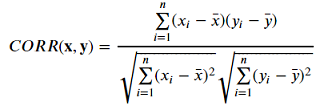

In [8]:
user_user_matrix = user_movie_matrix.corr(method='pearson')
user_user_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.106322,-0.016424,0.021716,0.302592,0.345976,0.320017,0.276208,0.038812,0.288491,...,0.285923,0.068878,0.189272,0.146979,0.119444,0.060175,0.247483,0.115504,0.108984,0.323231
2,0.106322,1.000000,0.082680,0.160323,0.020218,0.197844,0.022886,0.072772,0.143716,0.106861,...,0.106416,0.288550,0.325233,0.408466,0.289112,0.204094,0.190848,0.144177,0.138292,0.054235
3,-0.016424,0.082680,1.000000,0.331674,-0.028322,0.017673,-0.013384,0.055385,0.043505,0.012080,...,-0.020605,0.018746,0.124174,0.046247,0.088974,-0.001145,0.127539,0.084532,0.102025,-0.023601
4,0.021716,0.160323,0.331674,1.000000,-0.002426,0.030206,0.041056,0.171116,0.089372,0.024018,...,0.016641,0.019738,0.105135,0.179598,0.122649,0.010890,0.174904,0.140811,0.149575,0.025367
5,0.302592,0.020218,-0.028322,-0.002426,1.000000,0.153409,0.279677,0.209280,0.025496,0.117166,...,0.272866,0.039333,0.013999,0.039519,0.085548,0.024292,0.182466,0.112571,0.096603,0.248991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.060175,0.204094,-0.001145,0.010890,0.024292,0.059487,0.032591,0.068270,0.021669,0.018157,...,0.015185,0.416779,0.223173,0.207318,0.410470,1.000000,0.049517,0.164739,0.008036,0.100749
940,0.247483,0.190848,0.127539,0.174904,0.182466,0.295949,0.251988,0.213408,0.096886,0.287583,...,0.273078,0.074005,0.128224,0.152222,0.124941,0.049517,1.000000,0.122478,0.221234,0.182613
941,0.115504,0.144177,0.084532,0.140811,0.112571,0.113858,0.008168,0.129096,0.132400,0.057182,...,0.012887,0.189966,0.269370,0.221696,0.297188,0.164739,0.122478,1.000000,0.080130,0.065300


In [19]:
user_user_matrix.to_csv("user_user_matrix-from-2.0-Basis-Collaborative-Filtering.csv", index=False)

Result:
User 5 more similar to user 1 from user 2 since 0.302592 > 0.020218

# **Evaluation on user_id 1:**

Extarcing the top 10 users who are similar to User 1 by arranging them according to how similar they are


In [9]:
df_1 = pd.DataFrame(user_user_matrix.loc[1].sort_values(ascending=False).head(10))
df_1 = df_1.reset_index()
df_1.columns = ['user_id', 'similarity']
# we need to remove the user_is = 1 from the top of the list to not repeat the already watched movies
df_1 = df_1.drop((df_1[df_1['user_id'] == 1]).index)
df_1

,user_id,similarity
1,916,0.487949
2,738,0.471105
3,864,0.465283
4,457,0.457111
5,268,0.457105
6,823,0.454805
7,92,0.445430
8,514,0.445359
9,435,0.444815


In [10]:
final_df = df_1.merge(df, left_on='user_id', right_on='user_id', how='left')
final_df

,user_id,similarity,movie_id,rating,title
0,916,0.487949,467,3,"Bronx Tale, A (1993)"
1,916,0.487949,1428,3,SubUrbia (1997)
2,916,0.487949,271,3,Starship Troopers (1997)
3,916,0.487949,232,3,Young Guns (1988)
4,916,0.487949,100,5,Fargo (1996)
...,...,...,...,...,...
2505,435,0.444815,201,4,Evil Dead II (1987)
2506,435,0.444815,635,3,"Fog, The (1980)"
2507,435,0.444815,84,2,Robert A. Heinlein's The Puppet Masters (1994)
2508,435,0.444815,709,4,Strictly Ballroom (1992)


# **Evaluation**

Here, the user similarity and the movie rating are multiplied to create a new (score). The fundamental notion is that the user who is most like you will be more likely to recommend films that are better. As a result, a film that has received a high rating from the user who is most like it will rank higher in our recommendation.


In [11]:
final_df['score'] = final_df['similarity']*final_df['rating']
final_df

,user_id,similarity,movie_id,rating,title,score
0,916,0.487949,467,3,"Bronx Tale, A (1993)",1.463847
1,916,0.487949,1428,3,SubUrbia (1997),1.463847
2,916,0.487949,271,3,Starship Troopers (1997),1.463847
3,916,0.487949,232,3,Young Guns (1988),1.463847
4,916,0.487949,100,5,Fargo (1996),2.439746
...,...,...,...,...,...,...
2505,435,0.444815,201,4,Evil Dead II (1987),1.779259
2506,435,0.444815,635,3,"Fog, The (1980)",1.334444
2507,435,0.444815,84,2,Robert A. Heinlein's The Puppet Masters (1994),0.889629
2508,435,0.444815,709,4,Strictly Ballroom (1992),1.779259


In [12]:
watched_df = df[df['user_id'] == 1]
watched_df

,user_id,movie_id,rating,title
202,1,61,4,Three Colors: White (1994)
305,1,189,3,"Grand Day Out, A (1992)"
333,1,33,4,Desperado (1995)
334,1,160,4,Glengarry Glen Ross (1992)
478,1,20,4,Angels and Insects (1995)
...,...,...,...,...
92049,1,28,4,Apollo 13 (1995)
92487,1,172,5,"Empire Strikes Back, The (1980)"
94019,1,122,3,"Cable Guy, The (1996)"
96699,1,152,5,Sleeper (1973)


In [13]:
cond = final_df['movie_id'].isin(watched_df['movie_id'])
final_df.drop(final_df[cond].index, inplace = True)

In [14]:
final_df

,user_id,similarity,movie_id,rating,title,score
0,916,0.487949,467,3,"Bronx Tale, A (1993)",1.463847
1,916,0.487949,1428,3,SubUrbia (1997),1.463847
5,916,0.487949,366,3,Dangerous Minds (1995),1.463847
6,916,0.487949,1046,2,Malice (1993),0.975898
7,916,0.487949,470,3,Tombstone (1993),1.463847
...,...,...,...,...,...,...
2503,435,0.444815,603,3,Rear Window (1954),1.334444
2504,435,0.444815,441,3,"Amityville Horror, The (1979)",1.334444
2506,435,0.444815,635,3,"Fog, The (1980)",1.334444
2508,435,0.444815,709,4,Strictly Ballroom (1992),1.779259


In [15]:
recommended_df = final_df.sort_values(by='score', ascending=False)[['title', 'score']].head(10)
recommended_df = recommended_df.reset_index()
del recommended_df['index']

In [16]:
recommended_df

,title,score
0,Bob Roberts (1992),2.439746
1,Stealing Beauty (1996),2.439746
2,"City of Lost Children, The (1995)",2.439746
3,Casablanca (1942),2.439746
4,Lawrence of Arabia (1962),2.439746
5,William Shakespeare's Romeo and Juliet (1996),2.439746
6,Wings of Desire (1987),2.439746
7,True Lies (1994),2.355524
8,Titanic (1997),2.355524
9,Rear Window (1954),2.355524
